In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt

In [15]:
# Open the file
outputdir='output/netcdf'

# Open 2t files

icon_histo_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_ICON_historical-1990_ann.nc')
icon_histo_ts_ann=xr.open_mfdataset(icon_histo_ts_ann)

icon_ssp_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_ICON_ssp370_ann.nc')
icon_ssp_ts_ann=xr.open_mfdataset(icon_ssp_ts_ann)

ifsnemo_histo_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc')
ifsnemo_histo_ts_ann=xr.open_mfdataset(ifsnemo_histo_ts_ann)

ifsnemo_ssp_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_IFS-NEMO_ssp370_ann.nc')
ifsnemo_ssp_ts_ann=xr.open_mfdataset(ifsnemo_ssp_ts_ann)

era5_ts_ann=os.path.join(outputdir,
                         'global_time_series_timeseries_2t_ERA5_era5_ann_std.nc')
era5_ts_ann=xr.open_mfdataset(era5_ts_ann)

In [18]:
era5_ts_ann[list(era5_ts_ann.keys())[0]]

<xarray.DataArray '__xarray_dataarray_variable__' (time: 44)> Size: 352B
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(44,), dtype=float64, chunksize=(44,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 352B 1990-07-01 1990-07-01 ... 2032-07-01

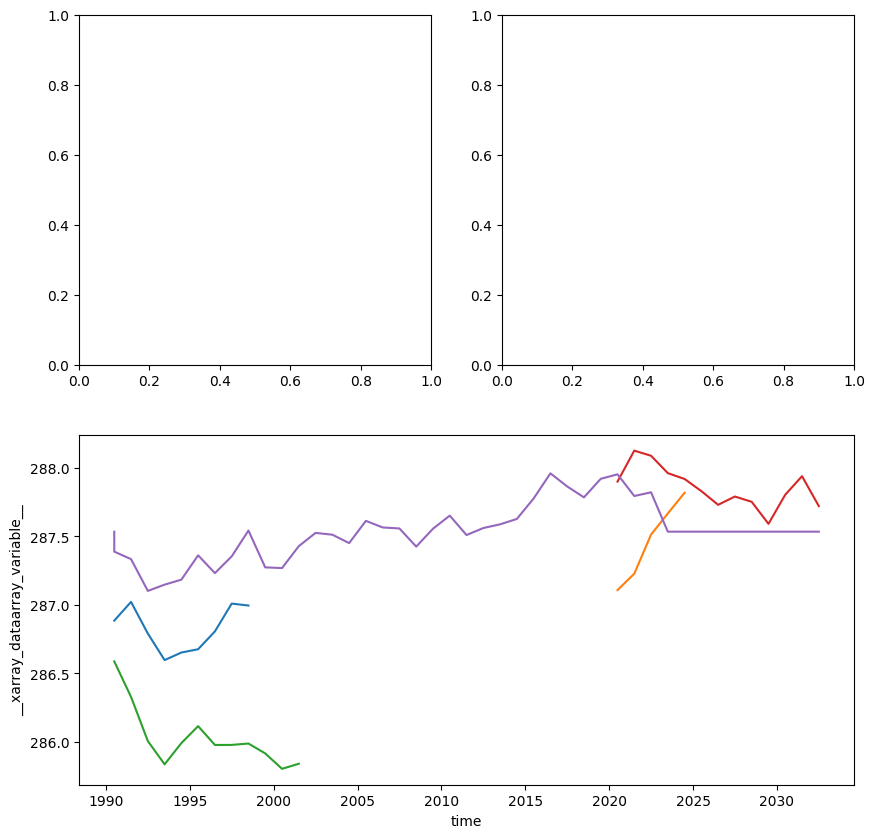

In [19]:
fig = plt.figure(figsize=(10, 10))

# Top line, gregory plot
ax1 = plt.subplot(2, 2, 1)

# Top line, seasonal cycle
ax2 = plt.subplot(2, 2, 2)

# Bottom line, timeseries
ax3 = plt.subplot(2, 1, 2)
icon_histo_ts_ann['2t'].plot(ax=ax3, label='ICON historical')
icon_ssp_ts_ann['2t'].plot(ax=ax3, label='ICON ssp370')
ifsnemo_histo_ts_ann['2t'].plot(ax=ax3, label='IFS-NEMO historical')
ifsnemo_ssp_ts_ann['2t'].plot(ax=ax3, label='IFS-NEMO ssp370')
era5_ts_ann[list(era5_ts_ann.keys())[0]].plot(ax=ax3, label='ERA5')
